In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons()

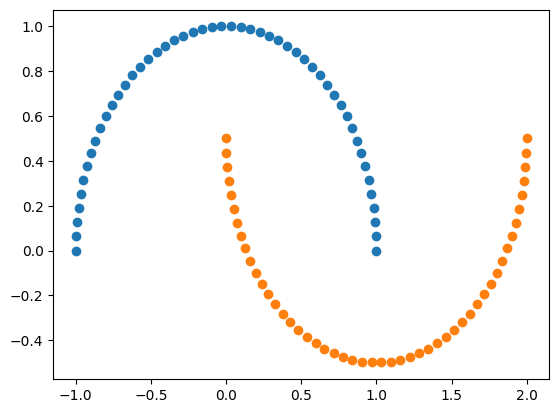

In [4]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [5]:
# 添加一点噪音
X, y = datasets.make_moons(noise=0.15, random_state=666)

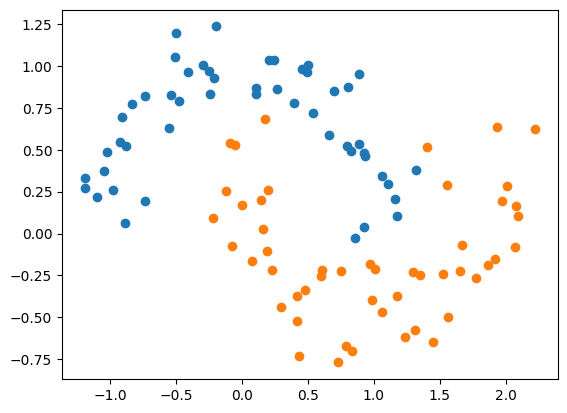

In [6]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [7]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

In [8]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearSVC', LinearSVC())])

In [9]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\IAdmin\AppData\Local\Temp\ipykernel_5660\1810111715.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


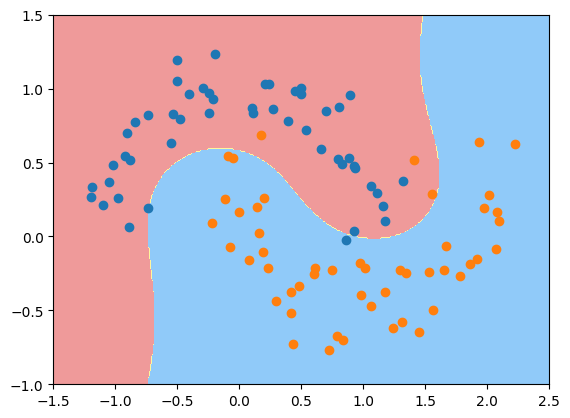

In [10]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [12]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C))
    ])

In [13]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('kernelSVC', SVC(kernel='poly'))])

C:\Users\IAdmin\AppData\Local\Temp\ipykernel_5660\1810111715.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


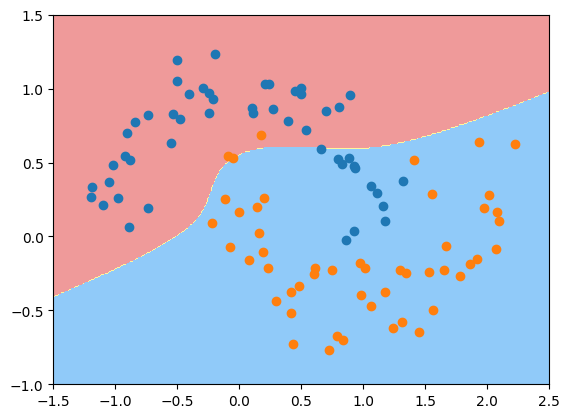

In [14]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()